In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pytesseract
%matplotlib inline

In [2]:
filename ='test_0.jpg'

In [3]:
img = Image.open(filename)

In [4]:
pytesseract.image_to_string(img)

''

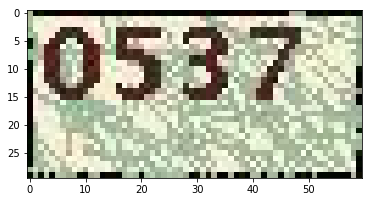

In [5]:
plt.imshow(img)

In [8]:
np_img=np.array(img)

In [9]:
gray_img =cv2.cvtColor(np_img,cv2.COLOR_BGR2GRAY)

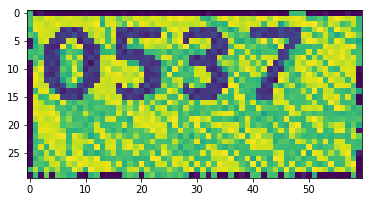

In [10]:
plt.imshow(gray_img)

In [11]:
thresh,black_img = cv2.threshold(gray_img,127,255,0)

In [12]:
black_img

array([[255,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [  0, 255,   0, ...,   0, 255,   0]], dtype=uint8)

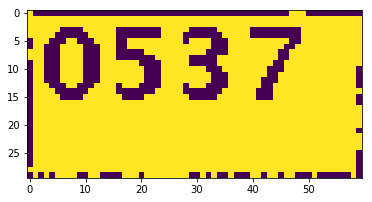

In [13]:
plt.imshow(black_img)

In [11]:
black_img.shape

(30, 60)

In [14]:
black_img_copy=black_img.copy()

In [15]:
black_img_copy.shape

(30, 60)

In [ ]:
black_img_copy[0,:]

In [ ]:
tmp_img = np.zeros(black_img_copy.shape)

In [ ]:
plt.imshow(tmp_img)

In [ ]:
tmp_img[0,:]=255

In [ ]:
tmp_img[-1,:]=255

In [ ]:
tmp_img[:,0]=255

In [ ]:
tmp_img[:,-1]=255

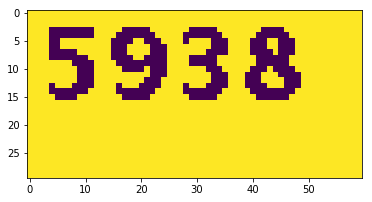

In [15]:
plt.imshow(black_img_copy)

In [16]:
black_img_copy[0,:]=255
black_img_copy[-1,:]=255
black_img_copy[:,0]=255
black_img_copy[:,-1]=255

In [17]:
(new_img,contours,hiera)=cv2.findContours(black_img_copy,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
cnts=[]
for idx,c in enumerate(contours):
    (x,y,w,h)=cv2.boundingRect(c)
    print(x,y,w,h)
    if w>5 and w<15:
        cnts.append(black_img_copy[y:y+h,x:x+w])

0 0 60 30
38 2 12 15
42 10 4 4
43 5 2 3
27 2 10 15
14 2 12 15
18 5 4 4
3 2 10 15


In [17]:
len(cnts)

4

In [37]:
cnts

[array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255],
        [255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255],
        [255, 255,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255],
        [255, 255,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255],
        [255, 255,   0,   0,   0,   0, 255,   0,   0,   0, 255, 255],
        [255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255],
        [255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255],
        [255, 255,   0,   0,   0, 255,   0,   0,   0,   0, 255, 255],
        [255,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0, 255],
        [255,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0, 255],
        [255,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0, 255],
        [255, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255],
        [255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255],
        [255, 255, 2

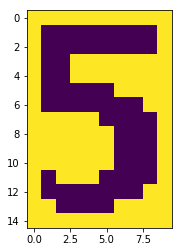

In [18]:
plt.imshow(cnts[3])

In [6]:
pytesseract.image_to_string(cnts[3])

NameError: name 'cnts' is not defined

In [51]:
import pickle

In [55]:
with open('img.pkl','wb') as f:
    pickle.dump(cnts,f)

In [46]:
type(cnts)

list

In [24]:
new_size=[]
for i in cnts:
    print(i.shape)
    new_size.append(cv2.resize(i,(12,15),interpolation=cv2.INTER_AREA))

(15, 12)
(15, 10)
(15, 12)
(15, 10)


In [25]:
for i in new_size:
    print(i.shape)

(15, 12)
(15, 12)
(15, 12)
(15, 12)


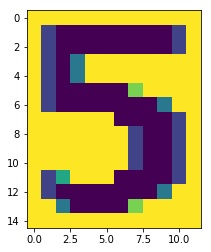

In [29]:
plt.imshow(new_size[3])

In [30]:
for i in new_size[0]:
    print(i)

[255 255 255 255 255 255 255 255 255 255 255 255]
[255 255 255 255   0   0   0   0 255 255 255 255]
[255 255 255   0   0   0   0   0   0 255 255 255]
[255 255   0   0   0 255 255   0   0   0 255 255]
[255 255   0   0   0 255 255   0   0   0 255 255]
[255 255   0   0   0   0 255   0   0   0 255 255]
[255 255 255   0   0   0   0   0   0 255 255 255]
[255 255 255   0   0   0   0   0   0 255 255 255]
[255 255   0   0   0 255   0   0   0   0 255 255]
[255   0   0   0 255 255 255   0   0   0   0 255]
[255   0   0   0 255 255 255 255   0   0   0 255]
[255   0   0   0   0 255 255 255   0   0   0 255]
[255 255   0   0   0   0   0   0   0   0 255 255]
[255 255 255   0   0   0   0   0   0 255 255 255]
[255 255 255 255 255 255 255 255 255 255 255 255]


In [20]:
import os
os.chdir('xl')

In [7]:
# 使用80个样本
sample_size = 80
input_folder = r'E:\git\base_function\image_detect\xl\{}'

In [38]:
file=r'0\test_0-3.jpg'

In [61]:
img = Image.open(file).convert('1')
# img
np_img = np.array(img)
# thresh,ret_img=cv2.threshold(np_img,127,255,0)
# gray_img = cv2.cvtColor(np_img,cv2.COLOR_BGR2GRAY)

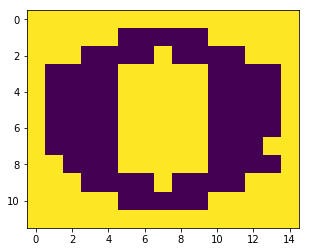

In [62]:
plt.imshow(np_img)

In [63]:
np_img

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False, False, False,  True, False,
        False, False, False,  True,  True,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False, False,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False, False,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False, False,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False, False,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False,  True,  True],
       [ True,  True, Fa

In [10]:
# 使用80个样本
import os
dataset=[]
labels=[]
sample_size = 80
input_folder = r'E:\git\base_function\image_detect\xl\{}'
for i in range(10):
    path=input_folder.format(i)
    for file in os.listdir(path)[:sample_size]:
        full_path = path+'\\'+file
        img=Image.open(full_path).convert('1')
#         np_img=np.array(img)
        dataset.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)

In [11]:
len(dataset)

800

In [12]:
len(labels)

800

In [32]:
from sklearn.cross_validation import train_test_split 
np_dataset=np.array(dataset)
X_train,X_test,y_train,y_test = train_test_split(np_dataset,labels,test_size=0.2,random_state=42)

In [23]:
len(X_train)

640

In [33]:
X_train.shape

(640, 180)

In [34]:
X_test.shape

(160, 180)

In [21]:
X_train[0]

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255]

In [11]:
dataset[0]

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255]

In [134]:
np_dataset=np.array(dataset)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

c:\python3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
X_scaled=scaler.transform(X_train)

c:\python3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
mlp = MLPClassifier(hidden_layer_sizes=(60,60,60),activation='logistic',max_iter=50000,verbose=True,tol=0.000001)
mlp.fit(X_scaled,y_train)

Iteration 1, loss = 2.36704201
Iteration 2, loss = 2.32322751
Iteration 3, loss = 2.30152066
Iteration 4, loss = 2.29118093
Iteration 5, loss = 2.28593649
Iteration 6, loss = 2.28119599
Iteration 7, loss = 2.27542470
Iteration 8, loss = 2.26949409
Iteration 9, loss = 2.26155998
Iteration 10, loss = 2.25254453
Iteration 11, loss = 2.24108484
Iteration 12, loss = 2.22785876
Iteration 13, loss = 2.21402587
Iteration 14, loss = 2.19806488
Iteration 15, loss = 2.17928360
Iteration 16, loss = 2.15832533
Iteration 17, loss = 2.13267376
Iteration 18, loss = 2.10542414
Iteration 19, loss = 2.07469225
Iteration 20, loss = 2.04035379
Iteration 21, loss = 2.00405045
Iteration 22, loss = 1.96422133
Iteration 23, loss = 1.92239689
Iteration 24, loss = 1.87894497
Iteration 25, loss = 1.83309210
Iteration 26, loss = 1.78649521
Iteration 27, loss = 1.73819918
Iteration 28, loss = 1.69004272
Iteration 29, loss = 1.64209801
Iteration 30, loss = 1.59354752
Iteration 31, loss = 1.54597520
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 60, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [42]:
X_test_scaled=scaler.transform(X_test)
predict = mlp.predict(X_test_scaled)

c:\python3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [43]:
predict

array([8, 8, 0, 6, 0, 7, 4, 6, 9, 5, 0, 3, 7, 0, 4, 4, 3, 4, 7, 6, 8, 6,
       7, 9, 4, 0, 3, 7, 9, 7, 2, 0, 7, 4, 0, 0, 8, 4, 9, 9, 1, 3, 2, 4,
       7, 6, 5, 7, 7, 6, 3, 1, 8, 3, 4, 4, 5, 4, 2, 3, 6, 9, 8, 3, 2, 5,
       0, 9, 4, 1, 6, 2, 9, 0, 0, 2, 4, 6, 7, 7, 5, 1, 0, 0, 6, 9, 9, 3,
       4, 1, 8, 8, 3, 4, 7, 7, 8, 9, 0, 9, 1, 5, 1, 1, 0, 2, 4, 9, 2, 4,
       5, 6, 1, 0, 9, 1, 6, 9, 2, 2, 3, 4, 1, 8, 2, 3, 7, 0, 3, 8, 8, 3,
       1, 8, 3, 6, 9, 3, 8, 5, 2, 6, 6, 2, 0, 5, 1, 4, 8, 6, 8, 0, 9, 9,
       6, 7, 9, 9, 6, 8])

In [46]:
y_test_np = np.array(y_test)

In [47]:
import pandas as pd
df_ret = pd.DataFrame({'test':y_test_np,'predict':predict})

In [48]:
df_ret

,test,predict
0,8,8
1,8,8
2,0,0
3,6,6
4,0,0
5,7,7
6,4,4
7,6,6
8,9,9
9,5,5


In [41]:
mlp.score(X_test,y_test)

1.0

In [150]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [151]:
from sklearn.externals import joblib
joblib.dump(mlp,'xlcaptcha.pkl')

['xlcaptcha.pkl']

In [110]:
test_data=[]
file=input_folder.format(3)+'\\0.jpg'
# file='0.jpg'
img = Image.open(file).convert('1')

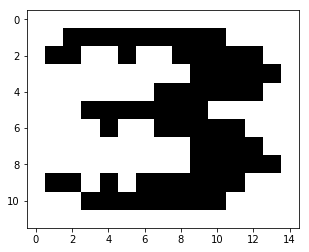

In [111]:
plt.imshow(img)

In [112]:
test_data.append([pixel for pixel in iter(img.getdata())])

In [ ]:
test_data

In [114]:
# scaler = StandardScaler()
# scaler.fit(test_data)
X_test_scaled=scaler.transform(test_data)

In [115]:
y_predict=mlp.predict(X_test_scaled)

In [116]:
y_predict[0]

2

In [ ]:
X_scaled[1]